# Lab 4

## Q0.

1. A model is linear when it follows the slope intercept equation: y = mx + b. This creates a line of best fit for the given data in a model, where m is the slope and b is the intercept.
2. The coefficient for a dummy/one hot encoded variable is the numerical value assigned to a categorical variable to represent the presence of that feature.
3. Linear regression cannot be used for classification since it involves continuous variables, not distinct categories.
4. The model is overfit - unable to generalize trends but instead memorized data points.
5. Two ways to incorporate nonlinear relationships in your x and y are: using a decision tree regressor or include polynomial features.
6. The intercept of a linear model is what the dependent variable is when the independent variable is 0. The slope coefficient is the average rise over run of the model. The coefficient of a dummy/one hot encoded variable represents the difference between the category and reference category of a variable.

## Q1.

In [27]:
import pandas as pd
from pandas import read_csv, Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import plotly.express as px

### 1. Compute the average prices and scores by Neighborhood ; which borough is the most expensive on average? Create a kernel density plot of price and log price, grouping by Neighborhood .

In [3]:
df = pd.read_csv(" https://raw.githubusercontent.com/DS3001/linearRegression/refs/heads/main/data/Q1_clean.csv")

df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [6]:
df1 = df.groupby('Neighbourhood ')

data = pd.DataFrame()
data = data.assign(score=df1['Review Scores Rating'].mean(),
                   price=df1['Price'].mean(),
                   )

data['log_price'] = np.log(data['price'])

data.head()


,score,price,log_price
Neighbourhood,,,
Bronx,91.654378,75.276498,4.321168
Brooklyn,92.363497,127.747378,4.850055
Manhattan,91.801496,183.664286,5.213110
Queens,91.549057,96.857233,4.573238
Staten Island,90.843750,146.166667,4.984748


It seems clear from the above table that Manhattan is the most expensive neighborhood on average.

/tmp/ipykernel_5778/1639553662.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Neighbourhood ")


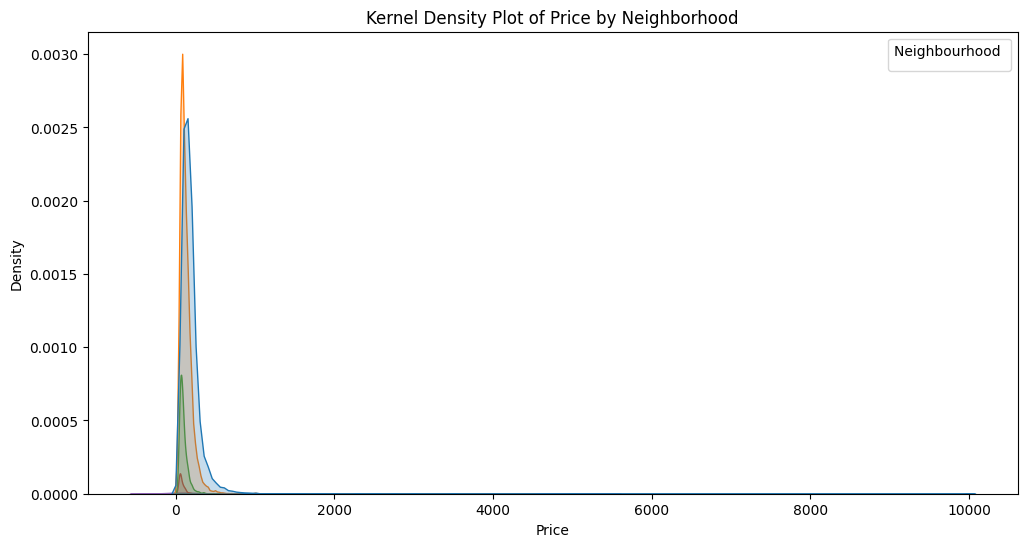

In [14]:
plt.figure(figsize=(12, 6))

sns.kdeplot(data=df, x="Price", hue="Neighbourhood ",fill=True)
plt.title("Kernel Density Plot of Price by Neighborhood")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend(title="Neighbourhood ")
plt.show()

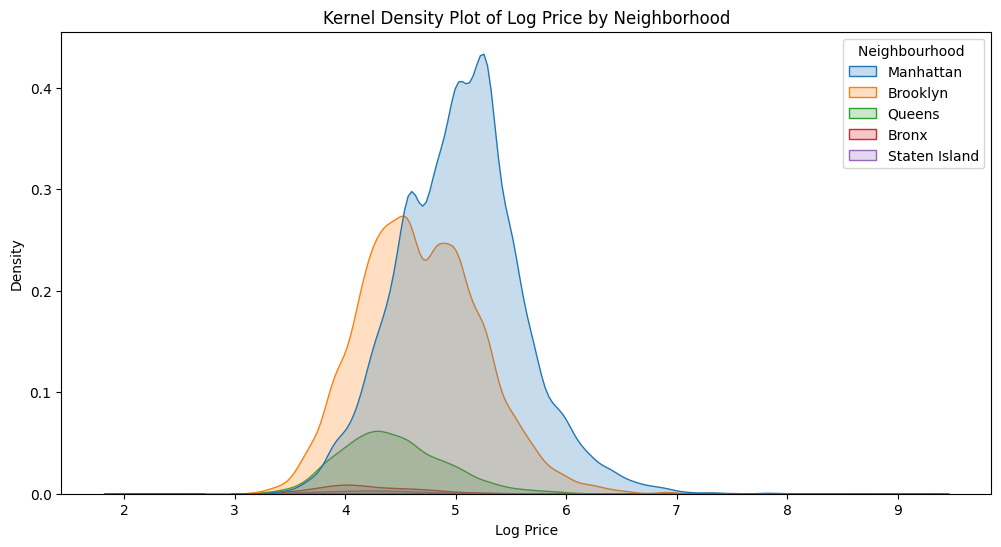

In [57]:
df['log_price']=np.log(df['Price'])

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x="log_price", hue="Neighbourhood ", fill=True)
plt.title("Kernel Density Plot of Log Price by Neighborhood")
plt.xlabel("Log Price")
plt.ylabel("Density")
plt.show()

### 2. Regress price on Neighborhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
df_encoded = pd.get_dummies(df, columns=['Neighbourhood '], drop_first=False)

df_encoded.head()

X = df_encoded.filter(like="Neighbourhood ")
y = df['Price']
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

coefficients = pd.DataFrame({'Neighborhood': X.columns, 'Coefficient': model.coef_})
print(coefficients)


                   Neighborhood  Coefficient
0          Neighbourhood _Bronx    75.276498
1       Neighbourhood _Brooklyn   127.747378
2      Neighbourhood _Manhattan   183.664286
3         Neighbourhood _Queens    96.857233
4  Neighbourhood _Staten Island   146.166667


The coefficients on this regression model are the mean prices seen in the table of question 1. This shows that the coefficients in a regression on a continuous variable on one categorical variable is just the mean values of the continuous variables.

### 3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [30]:
df_encoded1 = pd.get_dummies(df, columns=['Neighbourhood '], drop_first=True)
X = df_encoded1.filter(like="Neighbourhood ")
y = df['Price']
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

coefs = Series(model.coef_, index=model.feature_names_in_)
print(coefs)
print("Y INTERCEPT:", model.intercept_.round(3))



Neighbourhood _Brooklyn          52.470881
Neighbourhood _Manhattan        108.387789
Neighbourhood _Queens            21.580735
Neighbourhood _Staten Island     70.890169
dtype: float64
Y INTERCEPT: 75.276


The dummies are created by dropping one column to avoid multicollinearity. The intercept in this case is the mean price of the dropped column, the Bronx neighbourhood. As a result of this, the coefficients are a comparison of each neighborhood to the Bronx (how much less or more expensive they are). To get the coefficients from part 2, simply add the intercept to the coefficients in part 3. For the Bronx, the intercept is the coefficient.

### 4. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighborhood . What is the R^2 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [33]:
df_encoded = pd.get_dummies(df, columns=['Neighbourhood '], drop_first=True)
X = df_encoded[['Review Scores Rating'] + list(df_encoded.filter(like="Neighbourhood ").columns)]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("R2: ", r2)
print("RMSE: ", rmse)


R2:  0.07730220399907528
RMSE:  113.25938009463549


In [38]:
coeff_review_score = model.coef_[0]
print(coeff_review_score)

1.0448593664060473


In [40]:
coefs = Series(model.coef_, index=model.feature_names_in_)
print(coefs)
print("Y INTERCEPT:", model.intercept_.round(3))

Review Scores Rating              1.044859
Neighbourhood _Brooklyn          51.074092
Neighbourhood _Manhattan        107.729407
Neighbourhood _Queens            19.902409
Neighbourhood _Staten Island     83.126831
dtype: float64
Y INTERCEPT: -19.81


Manhattan has the most expensive property type due to its high coefficient.

### 5. Run a regression of Price on Review Scores Rating and Neighborhood and Property Type. What is the R^2 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [43]:
df_encoded = pd.get_dummies(df, columns=['Neighbourhood ', 'Property Type'], drop_first=True)

X = df_encoded[['Review Scores Rating'] + 
               list(df_encoded.filter(like="Neighbourhood_").columns) + 
               list(df_encoded.filter(like="Property Type_").columns)]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2, rmse)

0.003918978430172526 143.98703775773228


In [45]:
coeff_review_score = model.coef_[0]
print(coeff_review_score)

1.105552584263573


In [46]:
coefs = Series(model.coef_, index=model.feature_names_in_)
print(coefs)
print("Y INTERCEPT:", model.intercept_.round(3))

Review Scores Rating               1.105553
Property Type_Bed & Breakfast    -45.317770
Property Type_Boat               -18.423529
Property Type_Bungalow            18.287576
Property Type_Cabin              -54.918030
Property Type_Camper/RV          -75.068937
Property Type_Castle             -12.556844
Property Type_Chalet             -62.451292
Property Type_Condominium         58.960457
Property Type_Dorm               -76.382054
Property Type_House               -6.158032
Property Type_Hut               -105.923529
Property Type_Lighthouse        -123.556844
Property Type_Loft                54.310755
Property Type_Other               39.573219
Property Type_Townhouse           31.434766
Property Type_Treehouse           18.007936
Property Type_Villa                5.982024
dtype: float64
Y INTERCEPT: 52.002


It seems like the condominium is the most expensive rental type due to the high coefficient.

### 6. What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multiple linear regression works.

Since the coefficient changed after including property type, it means that property type influences the relationship between the score ratings and price.

## Q2.

### 1. Load cars_hw.csv. These data were really dirty, and I’ve already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly skewed variables that require a log or arcsinh transformation) Note this is different than normalizing: there is a text below that explains further. Clean the data however you think is most appropriate.

In [48]:
cars = pd.read_csv("/workspaces/DS-3021/05.1_reg_data_prep/cars_hw (1).csv")

cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [ ]:
cars['log_price'] = np.log1p(cars['Price'])

In [65]:
cars['No_of_Owners'] = cars['No_of_Owners'].replace({'st': '', 'nd': '', 'rd': ''}, regex=True)
cars['No_of_Owners'] = cars['No_of_Owners'].astype(int)

cars.head()


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price,log_price
0,1,Volkswagen,2017,silver,sedan,44611,1,5,diesel,7-Speed,Automatic,657000,13.395441
1,2,Hyundai,2016,red,crossover,20305,1,5,petrol,5-Speed,Manual,682000,13.432786
2,3,Honda,2019,white,suv,29540,2,5,petrol,5-Speed,Manual,793000,13.583580
3,4,Renault,2017,bronze,hatchback,35680,1,5,petrol,5-Speed,Manual,414000,12.933624
4,5,Hyundai,2017,orange,hatchback,25126,1,5,petrol,5-Speed,Manual,515000,13.151924


### 2. Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

In [66]:
cars['Price'].describe()

count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64

In [67]:
price_by_make = cars.groupby('Make')['Price'].describe()
print(price_by_make)

               count          mean           std        min        25%  \
Make                                                                     
Chevrolet        6.0  4.535000e+05  2.466064e+05   267000.0   288500.0   
Datsun           3.0  2.896667e+05  1.050397e+04   279000.0   284500.0   
Ford            52.0  7.211731e+05  1.409277e+05   290000.0   635000.0   
Honda           73.0  7.989726e+05  2.665091e+05   316000.0   581000.0   
Hyundai        305.0  6.918918e+05  2.791597e+05   248000.0   485000.0   
Jeep             4.0  1.499500e+06  1.525134e+05  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  1.190567e+05  1369000.0  1579000.0   
MG Motors       35.0  1.869457e+06  1.216611e+05  1589000.0  1786500.0   
Mahindra        18.0  1.100167e+06  1.755493e+05   796000.0  1037000.0   
Maruti Suzuki  293.0  5.887850e+05  2.160199e+05   237000.0   411000.0   
Nissan           4.0  8.842500e+05  2.895599e+05   475000.0   782500.0   
Renault         68.0  6.625735e+05  2.

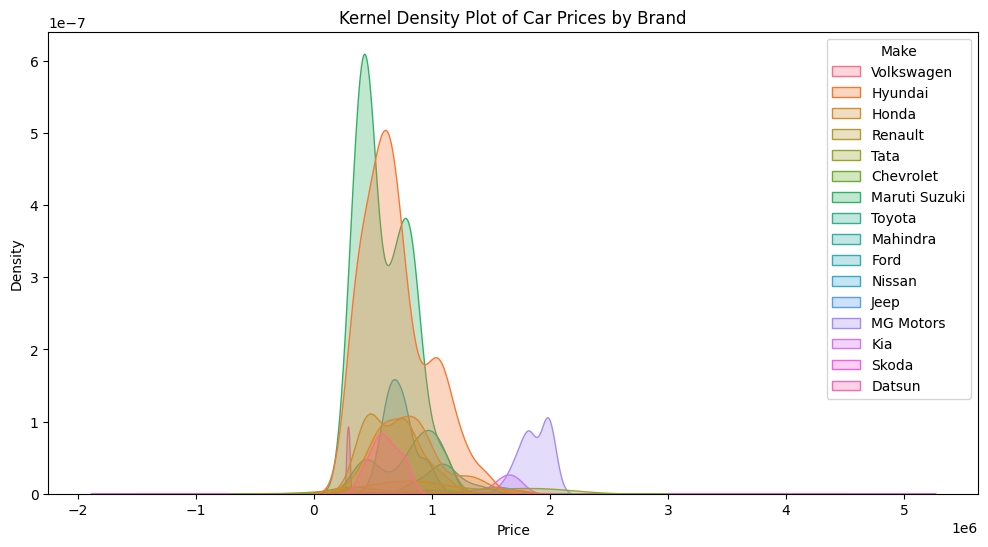

In [68]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=cars, x="Price", hue="Make", fill=True, alpha=0.3)
plt.title("Kernel Density Plot of Car Prices by Brand")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

From the graph, it looks like MG Motors is the most expensive car. however, in general car prices seem to stay within the same range of values and are not too different from each other.

### 3. Split the data into an 80% training set and a 20% testing set.

In [69]:
train_set, test_set = train_test_split(cars, test_size=0.2)

### 4. Make a model where you regress price on the numeric variables alone; what is the R^2 and RMSE on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use pd.get_dummies(); be careful of the dummy variable trap); what is the R^2 and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the R^2 and RMSE on the test set? Does the joint model perform better or worse, and by home much?

MODEL 1:

In [ ]:
numeric = cars.select_dtypes(include=['number']).columns.tolist()
numeric.remove("Price")
numeric.remove("log_price")
print(numeric)

train_set, test_set = train_test_split(cars, test_size=0.2, random_state=42)

['Unnamed: 0', 'Make_Year', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity']
['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']


In [76]:

X_train_num = train_set[numeric]
X_test_num = test_set[numeric]
y_train = train_set["Price"]
y_test = test_set["Price"] 
model1 = LinearRegression()
model1.fit(X_train_num, y_train)

LinearRegression()

In [79]:
y_train_pred1 = model1.predict(X_train_num)
y_test_pred1 = model1.predict(X_test_num)
r2_train1 = r2_score(y_train, y_train_pred1)
r2_test1 = r2_score(y_test, y_test_pred1)
rmse_train1 = np.sqrt(mean_squared_error(y_train, y_train_pred1))
rmse_test1 = np.sqrt(mean_squared_error(y_test, y_test_pred1))

print("Training r2, rmse: ", r2_train1, rmse_train1)
print("Testing r2, rmse: ", r2_test1, rmse_test1)

Training r2, rmse:  0.31907371999375167 308292.22601195367
Testing r2, rmse:  0.28895726047826165 285575.54192941176


MODEL 2:

In [115]:
categorical = cars.select_dtypes(include=['object']).columns.tolist()
print(categorical)

X1 = cars.drop('Price', axis=1) 
y1 = cars['Price']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2)
print(X_train1.shape)
print(X_test1.shape)

X_train_cat = pd.get_dummies(X_train1[categorical], drop_first=True)
X_test_cat = pd.get_dummies(X_test1[categorical], drop_first=True)

X_test_cat = X_test_cat.reindex(columns=X_train_cat.columns, fill_value=0)


model2 = LinearRegression()
model2.fit(X_train_cat, y_train1)

print(X_train_cat.shape) 
print(X_test_cat.shape)
print(y_train1.shape)
print(y_test1.shape)

['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']
(780, 12)
(196, 12)
(780, 40)
(196, 40)
(780,)
(196,)


In [116]:
y_train_pred2 = model2.predict(X_train_cat)
y_test_pred2 = model2.predict(X_test_cat)

r2_train2 = r2_score(y_train1, y_train_pred2)
r2_test2 = r2_score(y_test1, y_test_pred2)

rmse_train2 = np.sqrt(mean_squared_error(y_train, y_train_pred2))
rmse_test2 = np.sqrt(mean_squared_error(y_test, y_test_pred2))

print("Training r2, rmse: ", r2_train2, rmse_train2)
print("Testing r2, rmse: ", r2_test2, rmse_test2)

Training r2, rmse:  0.7519788759735799 479913.2725279393
Testing r2, rmse:  0.7750701935862228 524568.795237832


From these two models, it appears that the first model has a significantly lower rmse, meaning the model's predictions are more accurate.

MODEL 3:

In [129]:
X_train_combined = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_combined = pd.concat([X_test_num, X_test_cat], axis=1)
X_train_combined = X_train_combined.dropna()
X_test_combined = X_test_combined.dropna()

X_train_combined.head()

,Unnamed: 0,Make_Year,Mileage_Run,No_of_Owners,Seating_Capacity,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,...,Body_Type_muv,Body_Type_sedan,Body_Type_suv,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Manual
679,680.0,2018.0,18005.0,1.0,5.0,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
625,626.0,2013.0,47642.0,2.0,5.0,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
33,34.0,2021.0,13389.0,1.0,5.0,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
31,32.0,2013.0,10651.0,1.0,5.0,False,False,True,False,False,...,False,True,False,True,False,True,False,False,False,True
192,193.0,2020.0,8249.0,1.0,5.0,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
